# **Proyek Akhir: Predictive Analysis**

---

# Data Diri

Nama: Moh Fatchurrohman  
E-mail: fathrohman77@gmail.com  

# **1. Import Library**

*Library* [`os`](https://docs.python.org/3/library/os.html) untuk memproses *function* dari *operating system*. `os.environ` untuk membaca *username* dan *key* [Kaggle](https://kaggle.com).

*Library* [`pandas`](https://pandas.pydata.org) untuk melakukan pemrosesan, analisis dan manipulasi data.

*Library* [`tensorflow`](https://www.tensorflow.org) untuk melakukan pelatihan *machine learning* dan *neural networks*.

*Library* [`sklearn`](https://scikit-learn.org) untuk melakukan pemrosesan *machine learning* dan *data analysis*.

*Library* [`seaborn`](https://seaborn.pydata.org) untuk membuat visualisasi data yang berbasis `matplotlib`.

*Library* [`matplotlib`](https://matplotlib.org/) untuk melakukan visualisasi menggunakan *plotting*.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# **2. Data Loading**

## 2.1 Environment and Kaggle Credential

**Mengatur *environment*** `operating system` [Colab](https://colab.research.google.com) dengan variabel `KAGGLE_USERNAME` dan variabel `KAGGLE_KEY` untuk menghubungkan platform [Kaggle](https://kaggle.com/) menggunakan [Kaggle's Beta API](https://www.kaggle.com/docs/api) Token.

In [ ]:
# Username dan key Kaggle API
os.environ['KAGGLE_USERNAME'] = 'mohfatchurrohman'
os.environ['KAGGLE_KEY']      = '5ca599b3bbb5c61c18cdc5f0f9c31a00'

## 2.2 Dataset Download

**Mengunduh (*download*) *dataset*** dari Kaggle dengan nama *file* *dataset*, yaitu `ford.csv`. *Dataset* yang digunakan dalam proyek ini adalah *dataset* [Used Car](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=ford.csv) yang berupa berkas `.csv` ([Comma-separated Values](https://en.wikipedia.org/wiki/Comma-separated_values)).

In [ ]:
# Download dataset dari Kaggle
!kaggle datasets download -d adityadesai13/used-car-dataset-ford-and-mercedes -f ford.csv

Dataset URL: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
License(s): CC0-1.0
100% 911k/911k [00:00<00:00, 4.79MB/s]
100% 911k/911k [00:00<00:00, 4.78MB/s]


**Menampilkan isi *dataset*** menggunakan *library* [Pandas](https://pandas.pydata.org/) dengan mengubah format CSV menjadi *dataframe*.

In [ ]:
ford = pd.read_csv('ford.csv')
ford

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


Dari *dataframe* di atas dapat dilihat bahwa terdapat 17965 baris data dengan atribut sebanyak 9 kolom.
1.   `model` : Model mobil Ford
2.   `year` : Tahun registrasi
3.   `price` : Harga
4.   `transmission` : Transmisi
5.   `mileage` : Jarak yang tempuh
6.   `fuelType` : Jenis bahan bakar
7.   `tax` : Pajak jalan
8.   `mpg` : Mil per galon
9.   `engineSize` : Ukuran mesin (dalam liter)

## 2.3 Exploratory Data Analysis (EDA)

*Explanatory Data Analysis* (EDA) adalah suatu proses investigasi awal pada data untuk melakukan analisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data dengan menggunakan bantuan statistik dan representasi grafis atau visualisasi.

**2.3.1 Deskripsi Variabel**

Melakukan pengecekan informasi dari *dataframe* `ford` seperti, jumlah kolom, nama kolom, jumlah data setiap kolom, dan tipe data pada kolom.

In [ ]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Terdapat dua (2) atribut dengan tipe data `float64`, empat (4) atribut dengan tipe data `int64`, dan tiga (3) atribut dengan tipe data `object`.

**2.3.2 Deskripsi Statistik**

In [ ]:
ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Melihat deskripsi statistik dari *dataframe* `ford` yaitu,
1.   `count` : Jumlah data
2.   `mean` : Rata-rata
3.   `std` : Standar deviasi/simpangan baku
4.   `min` : Nilai minimum
5.   `25%` : Kuartil bawah/Q1
6.   `50%` : Kuartil tengah/Q2/median
7.   `75%` : Kuartil atas/Q3
8.   `max` : Nilai maksimum

**2.3.3 Menangani Missing Value**

Melakukan pengecekan apakah pada *dataframe* `ford` terdapat nilai 0.  

In [ ]:
tax = (ford.tax == 0).sum()
engineSize = (ford.engineSize == 0).sum()

print("Nilai 0 di kolom tax ada: ", tax)
print("Nilai 0 di kolom engineSize ada: ", engineSize)

Nilai 0 di kolom tax ada:  2153
Nilai 0 di kolom engineSize ada:  51


Pada *dataframe* `ford` ternyata ditemukan adanya nilai 0 di kolom `tax` ada 2153 dan di kolom `engineSize ` ada 51.  

In [ ]:
ford.loc[(ford['tax']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12,Fiesta,2017,11000,Manual,20978,Petrol,0,65.7,1.0
24,Fiesta,2014,6795,Manual,35299,Petrol,0,65.7,1.0
27,Fiesta,2015,8299,Manual,25935,Petrol,0,65.7,1.0
30,Fiesta,2016,7999,Manual,60730,Diesel,0,78.5,1.5
33,Fiesta,2013,7236,Manual,39090,Petrol,0,65.7,1.0
...,...,...,...,...,...,...,...,...,...
17877,Fiesta,2015,6900,Manual,37000,Petrol,0,65.7,1.0
17938,Fiesta,2015,8499,Manual,9264,Petrol,0,65.7,1.0
17942,Focus,2015,8000,Manual,65000,Diesel,0,74.3,1.5
17946,Fiesta,2015,8999,Manual,24546,Petrol,0,65.7,1.0


In [ ]:
# Drop baris dengan nilai 'tax' dan 'engineSize' = 0
ford = ford.loc[(ford[['tax','engineSize']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
ford.shape

(15768, 9)

In [ ]:
ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000
mean,2017.028602,12765.737633,22119.684044,128.773465,56.318981,1.374315
std,2.087788,4822.466547,19286.946428,48.811997,9.492793,0.441695
min,1996.000000,495.000000,1.000000,20.000000,20.800000,1.000000
25%,2016.000000,9545.750000,9247.000000,145.000000,51.400000,1.000000
50%,2017.000000,11995.000000,16821.000000,145.000000,57.700000,1.200000
75%,2018.000000,15899.000000,29470.250000,145.000000,62.800000,1.600000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


**2.3.3 Menangani Outliers**

Melakukan pengecekan pada *dataframe* `ford` terdapat data *outliers* atau sampel data yang nilainya berada sangat jauh dari cakupan umum data utama yang dapat merusak hasil analisis data. Pengecekan dilakukan dengan cara visualisasi data menggunakan [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) dengan bantuan *library* [`seaborn`](https://seaborn.pydata.org/).

<Axes: xlabel='engineSize'>

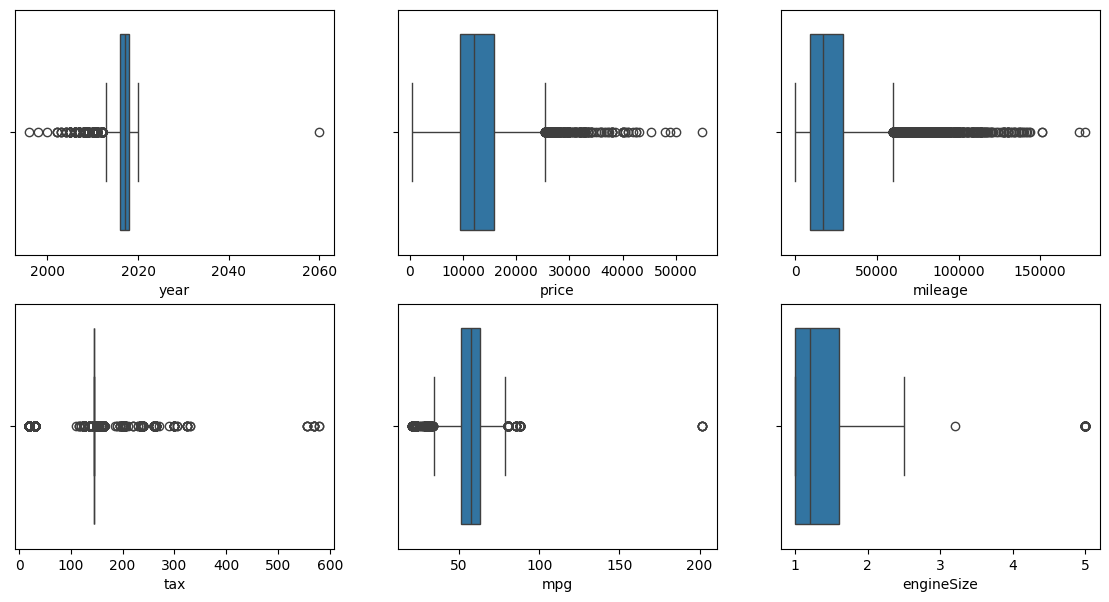

In [ ]:
# Mendeteksi outliers
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

sns.boxplot(ax=axes[0, 0], x=ford.year)
sns.boxplot(ax=axes[0, 1], x=ford.price)
sns.boxplot(ax=axes[0, 2], x=ford.mileage)

sns.boxplot(ax=axes[1, 0], x=ford.tax)
sns.boxplot(ax=axes[1, 1], x=ford.mpg)
sns.boxplot(ax=axes[1, 2], x=ford.engineSize)

Dapat dilihat pada diagram boxplot (diagram kotak garis) di atas, terdapat beberapa fitur numerik yang memiliki *outliers* seperti, `year`, `price`, `mileage`, `tax`, `mpg`, dan `engineSize`.

Untuk mengatasi *outliers*, dilakukan pendekatan menggunakan metode IQR (*Inter Quartile Range*).  

$IQR=Q3-Q1$  

Kemudian membuat batas bawah dan batas atas untuk mencakupi *outliers*.  

$batasBawah=Q1-1.5*IQR$  
$batasAtas=Q3-1.5*IQR$  

In [ ]:
# Mengatasi outliers
numeric_columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
Q1 = ford[numeric_columns].quantile(0.25)
Q3 = ford[numeric_columns].quantile(0.75)
IQR=Q3-Q1
ford=ford[~((ford[numeric_columns]<(Q1-1.5*IQR))|(ford[numeric_columns]>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
ford.shape

(8401, 9)

Sehingga diperoleh data yang telah dibersihkan sebanyak 8401 sampel.

Melakukan pengecekan kembali terhadap *outliers* dengan menggunakan visualisasi boxplot.

<Axes: xlabel='engineSize'>

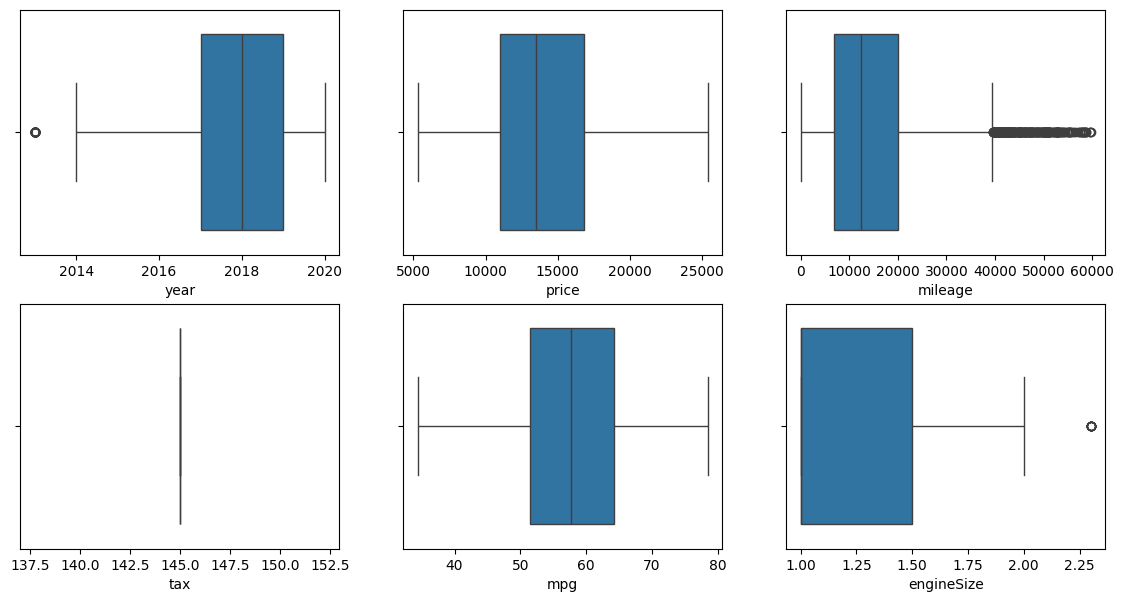

In [ ]:
# Mendeteksi outliers
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

sns.boxplot(ax=axes[0, 0], x=ford.year)
sns.boxplot(ax=axes[0, 1], x=ford.price)
sns.boxplot(ax=axes[0, 2], x=ford.mileage)

sns.boxplot(ax=axes[1, 0], x=ford.tax)
sns.boxplot(ax=axes[1, 1], x=ford.mpg)
sns.boxplot(ax=axes[1, 2], x=ford.engineSize)

Seletah dilakukan pembersihan *outliers* menggunakan metode IQR (*Inter Quartile Range*), dapat dilihat bahwa *outliers* telah berkurang pada boxplot di atas. Meskipun *outliers* masih ada pada fitur `year`, `mileage`, dan `engineSize`, tetapi masih dalam batas aman.

**2.3.4 Univariate Analysis**

Melakukan proses analisis data *univariate* pada fitur-fitur numerik.  

In [ ]:
numerical_features = ['price', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model', 'year', 'transmission', 'fuelType']

                        jumlah sampel  persentase
model                                            
 Fiesta                          3122        37.2
 Focus                           2327        27.7
 Kuga                            1230        14.6
 EcoSport                         587         7.0
 Ka+                              407         4.8
 Mondeo                           154         1.8
 S-MAX                            102         1.2
 C-MAX                             86         1.0
 B-MAX                             84         1.0
 Galaxy                            78         0.9
 Puma                              60         0.7
 Edge                              47         0.6
 Grand C-MAX                       45         0.5
 Grand Tourneo Connect             24         0.3
 KA                                19         0.2
 Tourneo Custom                    15         0.2
 Tourneo Connect                   13         0.2
 Mustang                            1         0.0


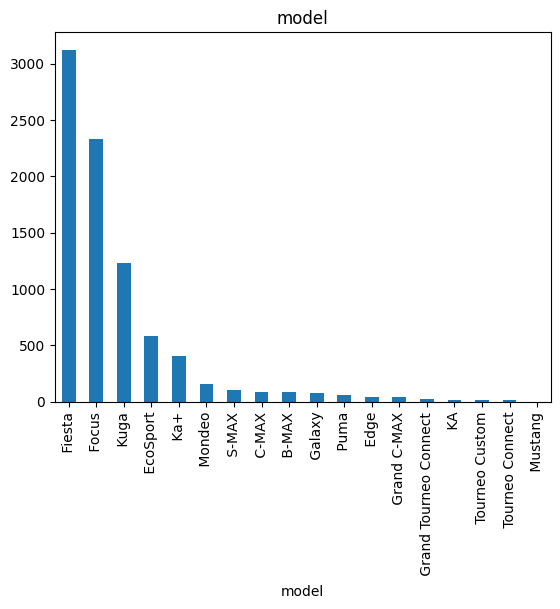

In [ ]:
# Categorical Features - Fitur Model
feature = categorical_features[0]
count = ford[feature].value_counts()
percent = 100*ford[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari data tabel dan histogram di atas diperoleh informasi, yaitu: model mobil yang paling banyak terjual adalah Model `Fiesta` dengan jumlah 3122 atau sebesar 37.2%

      jumlah sampel  persentase
year                           
2018           3228        38.4
2019           2546        30.3
2017           2091        24.9
2020            182         2.2
2016            150         1.8
2015             98         1.2
2014             61         0.7
2013             45         0.5


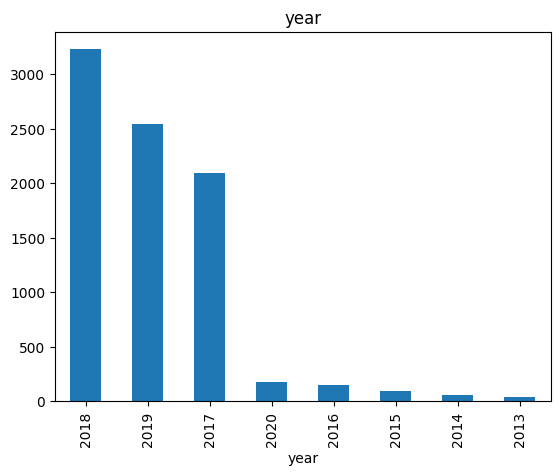

In [ ]:
# Categorical Features - Fitur Year
feature = categorical_features[1]
count = ford[feature].value_counts()
percent = 100*ford[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari data tabel dan histogram di atas diperoleh informasi, yaitu: yang paling banyak terjual adalah mobil dengan tahun registrasi `2018` dengan jumlah 3228 atau sebesar 38.4%

              jumlah sampel  persentase
transmission                           
Manual                 7290        86.8
Automatic               639         7.6
Semi-Auto               472         5.6


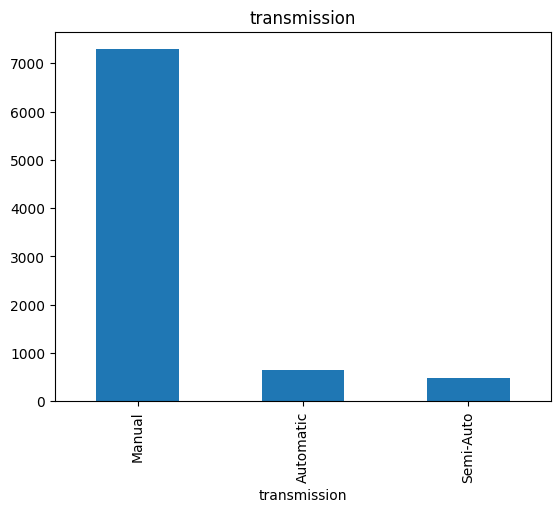

In [ ]:
# Categorical Features - Fitur Transmission
feature = categorical_features[2]
count = ford[feature].value_counts()
percent = 100*ford[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari data tabel dan histogram di atas diperoleh informasi, yaitu: transmisi mobil yang paling banyak terjual adalah transmisi `Manual` dengan jumlah 7290 atau sebesar 86.8%

          jumlah sampel  persentase
fuelType                           
Petrol             6243        74.3
Diesel             2156        25.7
Hybrid                2         0.0


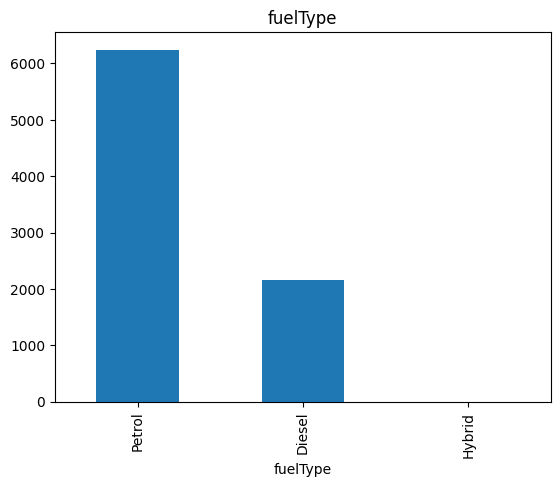

In [ ]:
# Categorical Features - Fitur Fuel Type
feature = categorical_features[3]
count = ford[feature].value_counts()
percent = 100*ford[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari data tabel dan histogram di atas diperoleh informasi, yaitu: jenis bahan bakar dari mobil yang paling banyak terjual adalah jenis `Petrol` dengan jumlah 6243 atau sebesar 74.3%

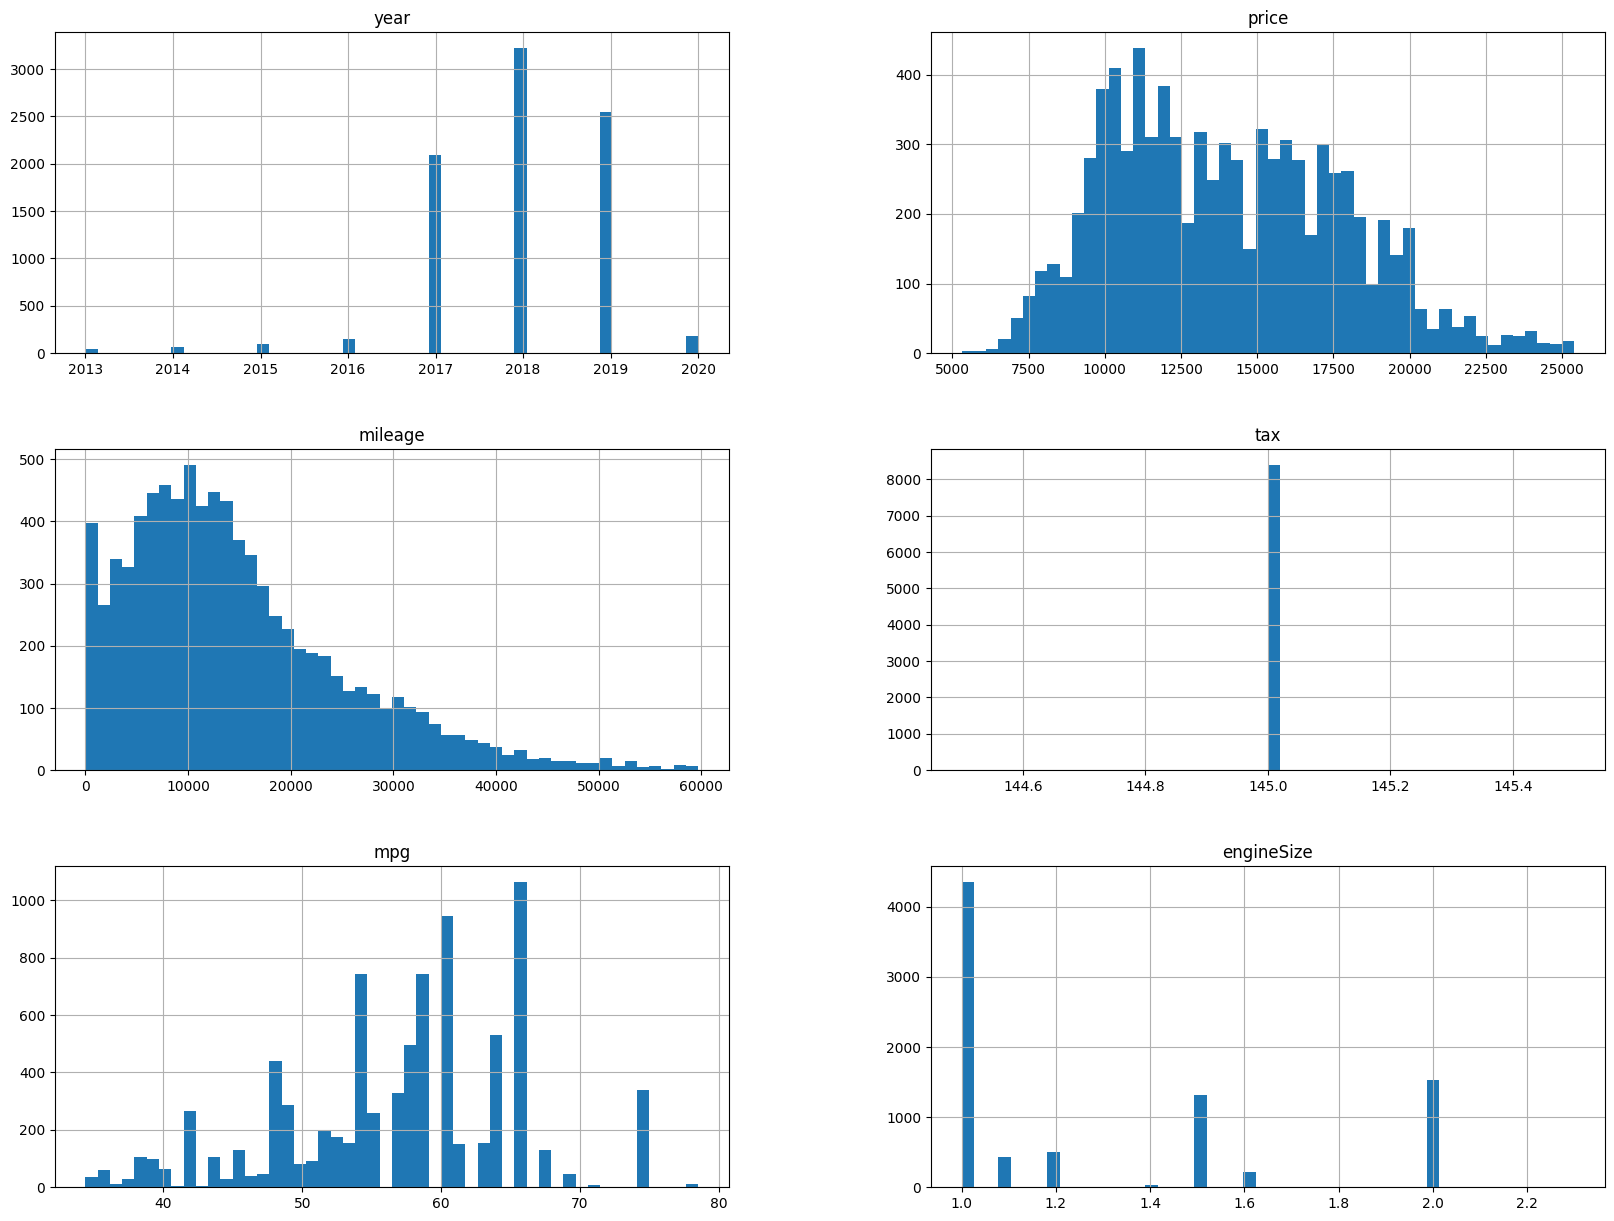

In [ ]:
# Numerical Features
ford.hist(bins=50, figsize=(20,15))
plt.show()

Dari data histogram di atas diperoleh informasi, yaitu:
1.   Penjualan mobil Ford paling banyak pada tahun 2018.
2.   Harga penjualan mobil Ford sebagian besar berada pada rentang 9500 sampai 18000, dan paling tinggi di harga sekitar 11000.
3.   Jarak tempuh pada mobil Ford yang terjual sebagian besar berada pada rentang 0 mile hingga 18000 mile, dan jarak tempuh yang paling panjang berada pada sekitar 10000 mile.
4.   Konsumsi bahan bakar (mil per galon) dari mobil Ford yang terjual sebagian besar pada rentang 55 mpg hingga 68 mpg, dan konsumsi bahan bakar dari mobil Ford paling banyak hingga 68 mpg.
5.   Ukuran mesin yang paling banyak adalah 1.0.
6.   Pendapatan pajak yang paling besar adalah 145.

**2.3.5 Multivariate Analysis**

Melakukan visualisasi distribusi data pada fitur-fitur numerik dari *dataframe* `ford`. Visualisasi dilakukan dengan bantuan *library* `seaborn` `pairplot` menggunakan parameter `diag_kind`, yaitu `kde`, untuk melihat perkiraan distribusi probabilitas antar fitur numerik.

<ipython-input-21-1e84e9f5db82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=ford, palette="Set3")
<ipython-input-21-1e84e9f5db82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=ford, palette="Set3")
<ipython-input-21-1e84e9f5db82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=ford, palette="Set3")


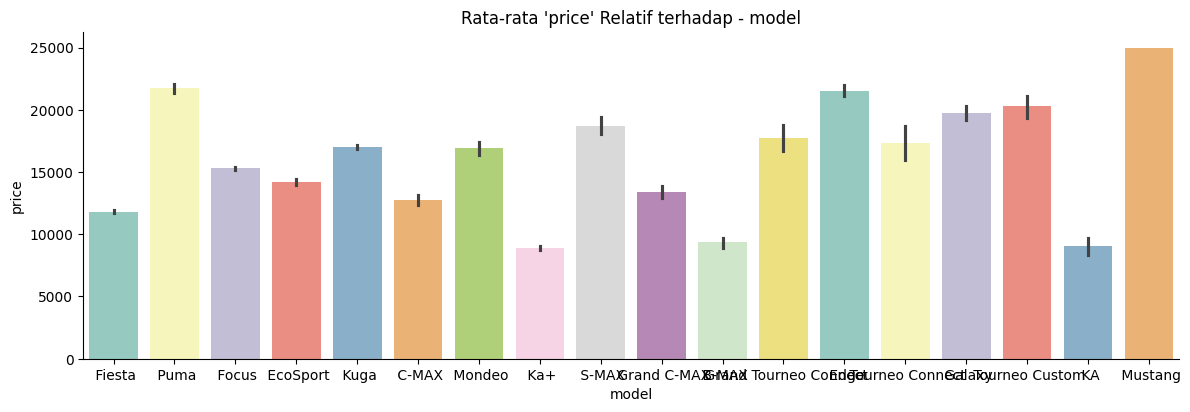

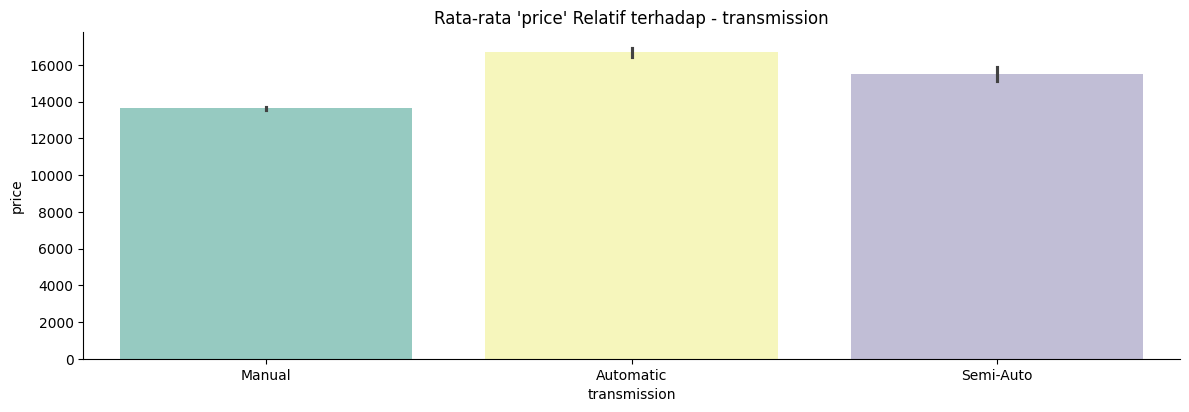

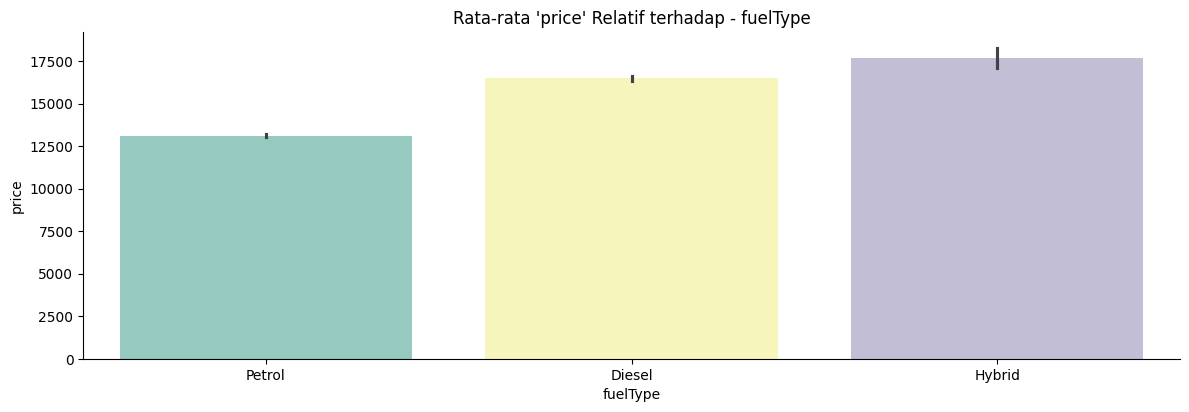

In [ ]:
# Categorical Features
cat_features = ford.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=ford, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

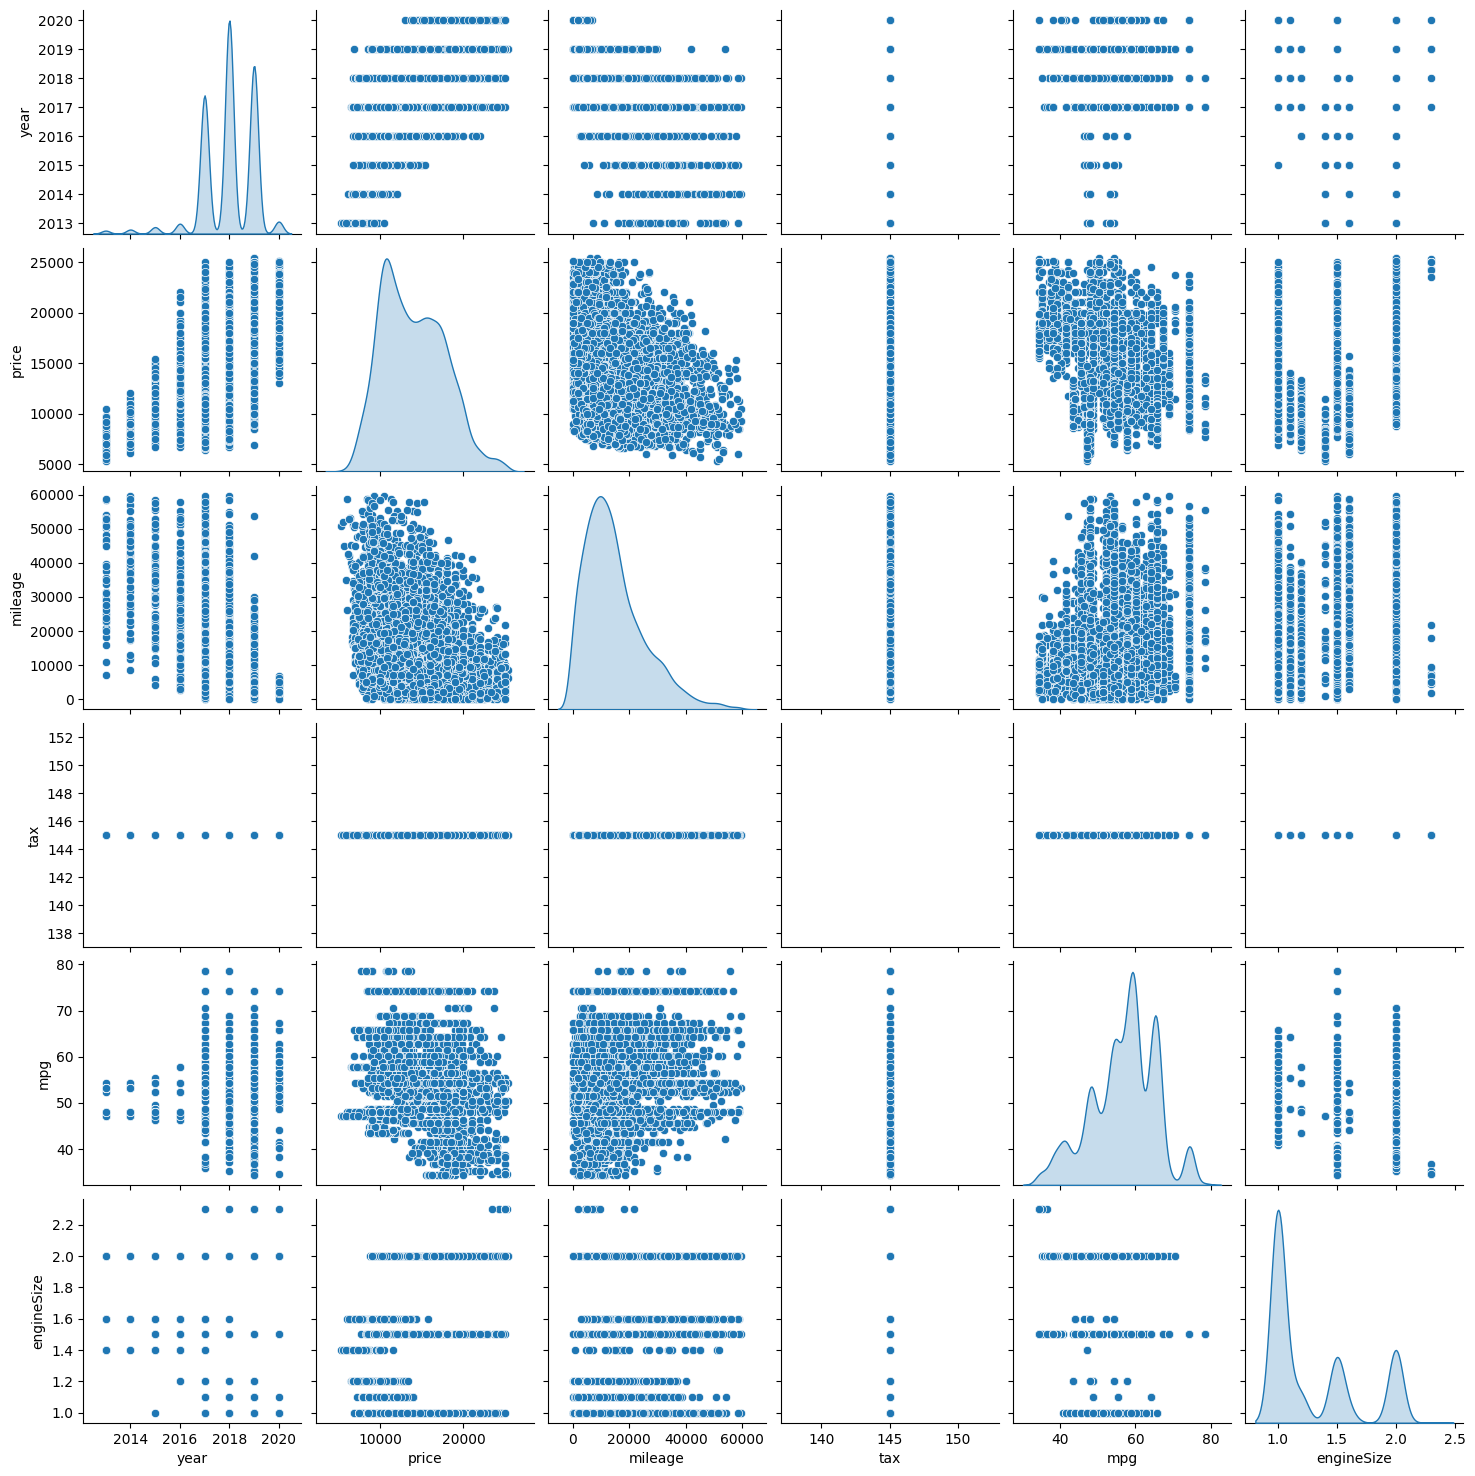

In [ ]:
# Numerical Features
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(ford, diag_kind = 'kde')

**2.3.6 Correlation Matrix menggunakan Heatmap**

Melakukan pengecekan korelasi antar fitur numerik dengan menggunakan visualisasi diagram *heatmap* *correlation matrix*.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

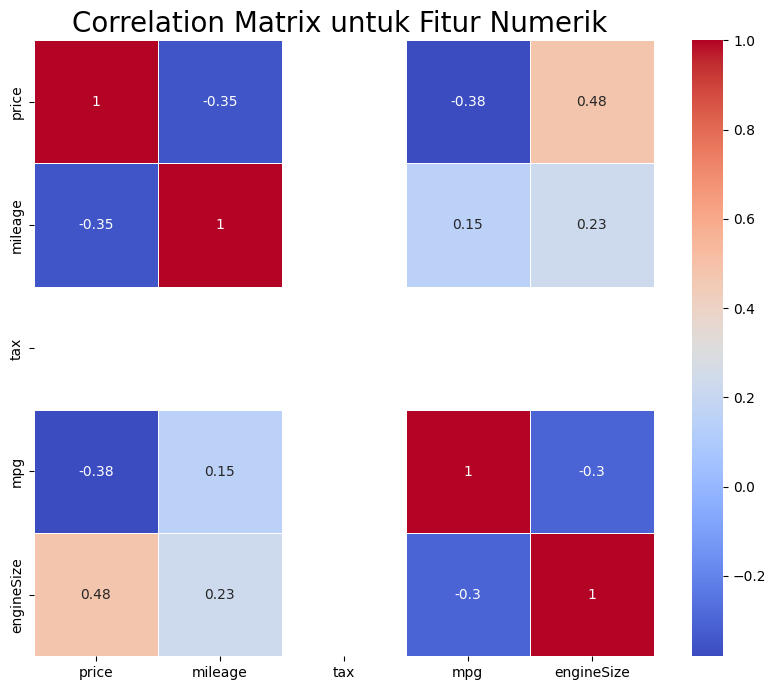

In [ ]:
# Mengevaluasi skor korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = ford[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dapat dilihat pada diagram *heatmap* di atas memiliki *range* atau rentang angka dari 1.0 hingga 0.4 dengan keterangan sebagai berikut,
*   Jika semakin mendekati 1, maka korelasi antar fitur numerik semakin kuat bernilai positif.
*   Jika semakin mendekati 0, maka korelasi antar fitur numerik semakin rendah.
*   Jika semakin mendekati -1, maka korelasi antar fitur numerik semakin kuat bernilai negatif.

Jika korelasi bernilai positif, berarti nilai kedua fitur numerik cenderung meningkat bersama-sama.

Jika korelasi bernilai negatif, berarti nilai salah satu fitur numerik cenderung meningkat ketika nilai fitur numerik yang lain menurun.


**2.3.6 Analisis Korelasi Antar Fitur**

Fitur `price` memiliki korelasi yang cukup kuat dengan fitur `mileage`, `mpg` dan `engineSize`.

Sehingga, fitur `tax` tidak memiliki korelasi dengan fitur `price`. Dengan begitu, dapat dilakukan *drop* (menghapus) fitur-fitur tersebut.

In [ ]:
# Drop korelasi yang sangat kecil
ford.drop(['tax'], inplace=True, axis=1)
ford.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2


## 2.4 Data Preparation

**2.4.1 Encoding Fitur Kategori**

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
ford = pd.concat([ford, pd.get_dummies(ford['model'], prefix='model')],axis=1)
ford = pd.concat([ford, pd.get_dummies(ford['year'], prefix='year')],axis=1)
ford = pd.concat([ford, pd.get_dummies(ford['transmission'], prefix='transmission')],axis=1)
ford = pd.concat([ford, pd.get_dummies(ford['fuelType'], prefix='fuelType')],axis=1)
ford.drop(['model','year','transmission','fuelType'], axis=1, inplace=True)
ford.head()

,price,mileage,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Fiesta,model_ Focus,...,year_2017,year_2018,year_2019,year_2020,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
3,17500,10460,40.3,1.5,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
4,16500,1482,48.7,1.0,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,True
5,10500,35432,47.9,1.6,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
6,22500,2029,50.4,1.0,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
7,9000,13054,54.3,1.2,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True


**2.4.2 Train-Test-Split**

Melakukan *define* atau mendefinisikan variabel `X` yang berisi fitur-fitur untuk memprediksi penggunaan daya (*power consumption*) dengan mengecualikan fitur yang tidak diperlukan, serta variabel `y` yang merupakan fitur target atau nilai yang akan diprediksi.

Melakukan pembagian *dataset* (*split data*) dengan menggunakan `train_test_split` menjadi data latih (*training*) dan data uji (*testing*). Lalu menampilkan total *dataset* secara keseluruhan, total data latih (*training*), dan total data uji (*testing*).

In [ ]:
from sklearn.model_selection import train_test_split

X = ford.drop(["price"],axis =1)
y = ford["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
# Cek jumlah sampel
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 8401
Total # of sample in train dataset: 7560
Total # of sample in test dataset: 841


**2.4.3 Standarisasi pada Fitur Numerik**

Melakukan standarisasi nilai pada fitur numerik dengan menggunakan `StandardScaler` dari *library* `scikit-learn`. Proses standarisasi ini bertujuan untuk mencegah terjadinya penyimpangan nilai data yang cukup besar.

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['engineSize']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,engineSize
5658,-0.766106
16752,0.791517
12681,-0.766106
6717,-0.766106
2466,0.531913


In [ ]:
# Cek nilai mean dan standar deviasi
X_train[numerical_features].describe().round(4)

,engineSize
count,7560.0000
mean,0.0000
std,1.0001
min,-0.7661
25%,-0.7661
50%,-0.7661
75%,0.5319
max,2.6087


`StandardScaler` akan melakukan proses standarisasi fitur dengan mengurangkan nilai rata-rata (`mean`) lalu membaginya dengan standar deviasi/simpangan baku (`std`) untuk menggeser distribusi nilai. Proses standarisasi akan menghasilakn distribusi dengan nilai rata-rata (`mean`) menjadi 0 dan nilai standar deviasi/simpangan baku (`std`) menjadi 1.

## 2.5 Model Development

**2.5.1 Model Preparation**

Mempersiapkan *dataframe* untuk melakukan analisis model dengan parameter `index`, yaitu `train_mse` dan `test_mse`, serta parameter `columns` yang merupakan algoritma yang akan digunakan untuk melakukan prediksi, yaitu algoritma K-Nearest Neighbor (KNN), Random Forest, dan Adaptive Boosting (AdaBoost).

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

**2.5.2 Model K-Nearest Neighbor (KNN)**

Algoritma K-Nearest Neighbor (KNN) akan menggunakan metode kemiripan dari data uji (*testing*) dan data latih (*training*) dengan mencari kesamaan pada fitur-fiturnya. K-Nearest Neighbor bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain berdasarkan sejumlah k-tetangga terdekat (k = nilai atau angka positif).

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

**2.5.3 Model Random Forest**

Algoritma Random Forest merupakan algoritma *supervised learning* yang termasuk pada golongan *ensemble* (*group*) *learning*. Oleh karena itu, algoritma Random Forest terdiri dari beberapa model yang akan bekerja bersama-sama secara independen, dan prediksi dari setiap model ensemble akan digabungkan untuk membuat hasil prediksi akhir.

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# Buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

**2.5.4 Model Boosting Algorithm**

Algoritma Adaptive Boosting (AdaBoost) merupakan algoritma yang melatih model secara berurutan dan dalam proses iteratif (berulang). Data latih (training) akan memiliki *weight* atau bobot yang sama, kemudian model akan melakukan pemeriksaan atau observasi. Bobot yang lebih tinggi kemudian akan dimasukkan ke dalam model yang salah sehingga akan lanjut ke tahap selanjutnya. Proses iteratif tersebut akan berlanjut hingga model mencapai akurasi yang diinginkan.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## 2.6 Evaluasi Model

Melakukan standarisasi atau *scaling* pada fitur numerik data uji (*testing*) sehingga rata-rata (*mean*) bernilai 0, dan varians bernilai 1.

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Melakukan evaluasi dari ketiga model, yaitu algoritma K-Nearest Neighbor, Random Forest, dan Adaptive Boosting (AdaBoost) untuk masing-masing data latih (*training*) dan data uji (*testing*) dengan melihat tingkat *error*-nya menggunakan Mean Squared Error (MSE).

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,9976.831948,13319.453937
RF,498.519317,1542.507149
Boosting,5250.046506,5239.754356


Melakukan visualisasi data *error* setiap model dengan algoritma K-Nearest Neighbor, Random Forest, dan Adaptive Boosting (AdaBoost) untuk masing-masing data latih (*training*) dan data uji (*testing*) dengan menggunakan plot *bar chart*.

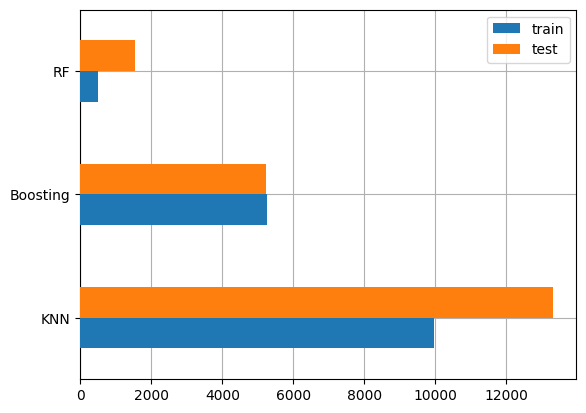

In [ ]:
# Plot metrik
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari visualisasi diagram di atas dapat disimpulkan bahwa,
1.   Model dengan algoritma Random Forest memberikan nilai *error* yang paling kecil, yaitu sebesar 498.5 pada *training error*, dan 1542.5 pada *testing error*.
2.   Model dengan algoritma Adaptive Boosting memiliki tingkat *error* yang sedang di antara dua algoritma lainnya.
3.   Model dengan algoritma K-Nearest Neighbor mengalami *error* yang paling beser dengan nilai *training error* sebesar 9976.8, dan nilai *testing error* sebesar 13319.4.

Melakukan pengujian prediksi dengan menggunakan beberapa nilai harga (*price*) dari data uji (*testing*)

In [ ]:
# Buat prediksi
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
4679,9750,13515.9,10032.9,11744.2


Dapat dilihat prediksi pada model dengan algoritma Random Forest memberikan hasil yang paling mendekati dengan nilai `y_true` jika dibandingkan dengan algoritma model yang lainnya.

Nilai `y_true` sebesar **9750** dan nilai prediksi `Random Forest` sebesar **10032.9**.

Kesimpulannya adalah model yang digunakan untuk melakukan prediksi harga mobil bekas produsen mobil Ford (*Used Car*) menghasilkan **tingkat *error* yang paling rendah** dengan menggunakan **algoritma Random Forest** pada model yang telah dibangun.